# Test and visualisation of the cdaweb datasets for the article 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
# Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import os
import bottleneck as bn

from SWx_modules.file_management import savloading
from SWx_modules.file_management.wind3sfromcdas import Wind3sFromCdas
from cdasws import CdasWs
cdas = CdasWs()



## Load PLSP dataset

In [3]:
# Load dataset

dataset = 'WI_PLSP_3DP'
# Edit the following var_names and example_interval 
# variables to suit your needs.
var_names = cdas.get_variable_names(dataset)
print('Variable names:', var_names)
variables = ['MOM.P.MAGF', 
            #  'MOM.P.DENSITY', 
            #  'MOM.P.AVGTEMP', 
            #  'MOM.P.VTHERMAL', 
             'MOM.P.VELOCITY', 
            #  'MOM.P.FLUX', 
            #  'MOM.P.PTENS', 
            #  'MOM.P.MFTENS', 
            #  'MOM.P.EFLUX', 
            #  'MOM.P.T3', 
            #  'MOM.P.SYMM', 
            #  'MOM.P.SYMM_THETA', 
            #  'MOM.P.SYMM_PHI', 
            #  'MOM.P.SYMM_ANG', 
            #  'MOM.P.MAGT3', 
            #  'MOM.P.ERANGE', 
            #  'MOM.P.MASS', 
             'MOM.P.VALID', 
            #  'MOM.P.VEL_MAG', # magnitude of velocity
            #  'MOM.P.VEL_TH',  
            #  'MOM.P.VEL_PHI',
            ]
years = [2004,2005,2006,2007,2008,2009,2010]
time0_list = [datetime.datetime(year=year,month=1,day=1,hour=0,tzinfo=datetime.timezone.utc) 
                  for year in years]
time1_list = [datetime.datetime(year=year+1,month=1,day=1,hour=0,tzinfo=datetime.timezone.utc)
                    for year in years]
dataframe = []
for idx,y in enumerate(years):
    if not os.path.isfile('C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/wind_plsp_24s_'+str(y)+'.pkl'):
        _, data_source = cdas.get_data(dataset, variables, time0_list[idx],time1=time1_list[idx])
        data = {}
        for var in variables:
            if var == 'MOM.P.MAGF':
                data[data_source['metavar0'][0]] = data_source[var][:,0]
                data[data_source['metavar0'][1]] = data_source[var][:,1]
                data[data_source['metavar0'][2]] = data_source[var][:,2]
            if var == 'MOM.P.VELOCITY':
                data[data_source['metavar1'][0]] = data_source[var][:,0]
                data[data_source['metavar1'][1]] = data_source[var][:,1]
                data[data_source['metavar1'][2]] = data_source[var][:,2]
            if var == 'MOM.P.VALID':
                data['valid'] = data_source[var]
        PLSP = pd.DataFrame(data, columns=data.keys(), index=data_source['Epoch'])
        print(max(PLSP.index[1:] - PLSP.index[:-1]))
        print(min(PLSP.index[1:] - PLSP.index[:-1]))
        print(PLSP.describe())
        savloading.save(PLSP,'C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/','wind_plsp_24s_'+str(y)+'.pkl')
    else:
        PLSP = savloading.load('C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/','wind_plsp_24s_'+str(y)+'.pkl')
        print(max(PLSP.index[1:] - PLSP.index[:-1]))
        print(min(PLSP.index[1:] - PLSP.index[:-1]))
        print(PLSP.describe())
    dataframe.append(PLSP)
df_PLSP = pd.concat(dataframe)
for col in df_PLSP.columns:
    if not col == 'valid':
        df_PLSP.loc[df_PLSP['valid'] == 0,col] = np.nan
df_PLSP.drop(columns='valid',inplace=True)
df_PLSP_resample = df_PLSP.resample('24s').mean(numeric_only=True).shift(periods=1,freq='24s')
for ind in df_PLSP_resample[df_PLSP_resample.isna().any(axis=1)].index:
    df_PLSP_resample.loc[ind-pd.to_timedelta('30s'):ind+pd.to_timedelta('30s')] = np.nan

Variable names: ['FLUX', 'FLUX_STACKED', 'ENERGY', 'MOM.P.SC_CURRENT', 'MOM.P.MAGF', 'MOM.P.DENSITY', 'MOM.P.AVGTEMP', 'MOM.P.VTHERMAL', 'MOM.P.VELOCITY', 'MOM.P.FLUX', 'MOM.P.PTENS', 'MOM.P.MFTENS', 'MOM.P.EFLUX', 'MOM.P.T3', 'MOM.P.SYMM', 'MOM.P.SYMM_THETA', 'MOM.P.SYMM_PHI', 'MOM.P.SYMM_ANG', 'MOM.P.MAGT3', 'MOM.P.ERANGE', 'MOM.P.MASS', 'MOM.P.VALID', 'MOM.P.VEL_MAG', 'MOM.P.VEL_TH', 'MOM.P.VEL_PHI', 'MOM.A.SC_CURRENT', 'MOM.A.MAGF', 'MOM.A.DENSITY', 'MOM.A.AVGTEMP', 'MOM.A.VTHERMAL', 'MOM.A.VELOCITY', 'MOM.A.FLUX', 'MOM.A.PTENS', 'MOM.A.MFTENS', 'MOM.A.EFLUX', 'MOM.A.T3', 'MOM.A.SYMM', 'MOM.A.SYMM_THETA', 'MOM.A.SYMM_PHI', 'MOM.A.SYMM_ANG', 'MOM.A.MAGT3', 'MOM.A.ERANGE', 'MOM.A.MASS', 'MOM.A.VALID', 'MOM.A.VEL_MAG', 'MOM.A.VEL_TH', 'MOM.A.VEL_PHI', 'TIME']
0 days 21:16:11.184000
-1 days +23:54:47.204000
             BX_GSE        BY_GSE        BZ_GSE  Proton_VX_GSE  Proton_VY_GSE  \
count  1.268491e+06  1.268491e+06  1.268491e+06   1.262674e+06   1.262674e+06   
mean   5.037313e-01

In [4]:
df_PLSP_resample['B'] = np.sqrt(df_PLSP_resample['BX_GSE']**2 + df_PLSP_resample['BY_GSE']**2 + df_PLSP_resample['BZ_GSE']**2)
df_PLSP_resample['Proton_V'] = np.sqrt(df_PLSP_resample['Proton_VX_GSE']**2 + df_PLSP_resample['Proton_VY_GSE']**2 + df_PLSP_resample['Proton_VZ_GSE']**2)

In [5]:
print(max(df_PLSP_resample.index[1:] - df_PLSP_resample.index[:-1]))
print(min(df_PLSP_resample.index[1:] - df_PLSP_resample.index[:-1]))
df_PLSP_resample.describe()

0 days 00:00:24
0 days 00:00:24


,BX_GSE,BY_GSE,BZ_GSE,Proton_VX_GSE,Proton_VY_GSE,Proton_VZ_GSE,B,Proton_V
count,5.932654e+06,5.932654e+06,5.932654e+06,5.932654e+06,5.932654e+06,5.932654e+06,5.932654e+06,5.932654e+06
mean,5.123723e-02,6.636155e-03,7.111762e-01,-4.451585e+02,1.549782e+01,-1.637557e+00,5.273524e+00,4.466402e+02
std,3.511479e+00,3.754965e+00,3.109900e+00,1.164180e+02,2.475944e+01,2.385229e+01,3.013923e+00,1.169362e+02
min,-4.524081e+01,-1.349429e+02,-7.588696e+01,-1.488659e+03,-9.398700e+02,-5.999814e+02,3.982845e-02,4.740040e+01
25%,-2.412830e+00,-2.390557e+00,-8.180775e-01,-5.147091e+02,3.831456e+00,-1.392680e+01,3.452806e+00,3.584581e+02
50%,1.010678e-01,-5.030422e-02,7.014393e-01,-4.171670e+02,1.443646e+01,-2.370211e+00,4.578948e+00,4.184606e+02
75%,2.502794e+00,2.381155e+00,2.255644e+00,-3.574745e+02,2.554447e+01,1.081191e+01,6.213717e+00,5.164650e+02
max,3.942125e+01,5.549907e+01,5.157833e+01,-3.713845e+01,8.032364e+02,5.564984e+02,1.597575e+02,1.490455e+03


In [6]:
df_PLSP_resample.head()

,BX_GSE,BY_GSE,BZ_GSE,Proton_VX_GSE,Proton_VY_GSE,Proton_VZ_GSE,B,Proton_V
2004-01-01 00:00:24,-13.790248,0.428980,-1.140743,-194.130234,57.917389,24.277248,13.843997,204.035172
2004-01-01 00:00:48,-13.726326,0.793553,-0.752290,-183.666199,42.215164,-17.895771,13.769811,189.303070
2004-01-01 00:01:12,-13.681721,1.080388,-0.622743,-301.742188,20.397079,75.754982,13.738432,311.774292
2004-01-01 00:01:36,-13.604577,1.372306,-0.439346,-189.730545,56.797428,-1.355450,13.680672,198.054199
2004-01-01 00:02:00,-13.650744,1.446867,-0.306245,-183.550735,79.044647,13.514988,13.730624,200.303726


## Load SWE dataset

In [7]:
dataset = 'WI_H1_SWE'
var_names = cdas.get_variable_names(dataset)
print('Variable names:', var_names)
variables = ['Proton_VX_moment', 'Proton_VY_moment', 'Proton_VZ_moment',]
years = [2004,2005,2006,2007,2008,2009,2010]
time0_list = [datetime.datetime(year=year,month=1,day=1,hour=0,tzinfo=datetime.timezone.utc) 
                 for year in years]
time1_list = [datetime.datetime(year=year+1,month=1,day=1,hour=0,tzinfo=datetime.timezone.utc)
                    for year in years]
dataframe = []
for idx,y in enumerate(years):
    if not os.path.isfile('C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/wind_swe_94s_'+str(y)+'.pkl'):
        _, data = cdas.get_data(dataset, variables, time0_list[idx],time1=time1_list[idx])
        SWE = pd.DataFrame(data, columns=variables, index=data['Epoch'])
        SWE[SWE.abs()>2e4]=np.nan
        savloading.save(SWE,'C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/','wind_swe_94s_'+str(y)+'.pkl')
    else:
        SWE = savloading.load('C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/','wind_swe_94s_'+str(y)+'.pkl')
    dataframe.append(SWE)
df_SWE = pd.concat(dataframe)
df_SWE['Proton_V'] = np.sqrt(df_SWE['Proton_VX_moment']**2+df_SWE['Proton_VY_moment']**2+df_SWE['Proton_VZ_moment']**2)

Variable names: ['fit_flag', 'year', 'doy', 'Proton_V_nonlin', 'Proton_V_nonlin_errorbars', 'Proton_sigmaV_nonlin', 'Proton_VX_nonlin', 'Proton_VX_nonlin_errorbars', 'Proton_sigmaVX_nonlin', 'Proton_VY_nonlin', 'Proton_VY_nonlin_errorbars', 'Proton_sigmaVY_nonlin', 'Proton_VZ_nonlin', 'Proton_VZ_nonlin_errorbars', 'Proton_sigmaVZ_nonlin', 'Proton_W_nonlin', 'Proton_W_nonlin_errorbars', 'Proton_sigmaW_nonlin', 'Proton_Wperp_nonlin', 'Proton_Wperp_nonlin_errorbars', 'Proton_sigmaWperp_nonlin', 'Proton_Wpar_nonlin', 'Proton_Wpar_nonlin_errorbars', 'Proton_sigmaWpar_nonlin', 'EW_flowangle', 'EW_flowangle_errorbars', 'SigmaEW_flowangle', 'NS_flowangle', 'NS_flowangle_errorbars', 'SigmaNS_flowangle', 'Proton_Np_nonlin', 'Proton_Np_nonlin_log', 'Proton_Np_nonlin_errorbars', 'Proton_sigmaNp_nonlin', 'Alpha_V_nonlin', 'Alpha_V_nonlin_errorbars', 'Alpha_sigmaV_nonlin', 'Alpha_VX_nonlin', 'Alpha_VX_nonlin_errorbars', 'Alpha_sigmaVX_nonlin', 'Alpha_VY_nonlin', 'Alpha_VY_nonlin_errorbars', 'Alpha_s

In [8]:
print(df_SWE)
df_SWE.describe()

                         Proton_VX_moment  Proton_VY_moment  Proton_VZ_moment  \
2004-01-01 00:05:23.156               NaN               NaN               NaN   
2004-01-01 00:29:43.901       -337.327240          9.906175         -8.441277   
2004-01-01 00:31:21.082       -376.205231        -12.171371        -19.223080   
2004-01-01 00:32:58.262       -308.878448        -13.394328        -21.501106   
2004-01-01 01:05:24.910       -441.357208         51.802540        -17.301775   
...                                   ...               ...               ...   
2010-12-31 23:53:08.425       -329.806061         -4.791732         -9.707870   
2010-12-31 23:54:46.518       -327.653656         -6.860422        -15.929653   
2010-12-31 23:56:24.611       -329.388214         -5.620309        -10.582614   
2010-12-31 23:58:02.704       -330.143555         -6.117310         -8.247011   
2010-12-31 23:59:40.797       -331.307526         -5.069810         -7.099411   

                           

,Proton_VX_moment,Proton_VY_moment,Proton_VZ_moment,Proton_V
count,2.013608e+06,2.013608e+06,2.013608e+06,2.013608e+06
mean,-4.268304e+02,1.608930e+00,-6.347544e+00,4.277349e+02
std,1.081187e+02,2.087691e+01,1.914381e+01,1.084615e+02
min,-1.154353e+03,-4.653630e+02,-1.906961e+02,2.098483e+02
25%,-4.907896e+02,-9.850887e+00,-1.648491e+01,3.443251e+02
50%,-3.997624e+02,6.404560e-02,-6.330525e+00,4.005980e+02
75%,-3.436747e+02,1.107274e+01,3.836626e+00,4.918246e+02
max,-2.051956e+02,5.217204e+02,2.026823e+02,1.154500e+03


## Visualisation

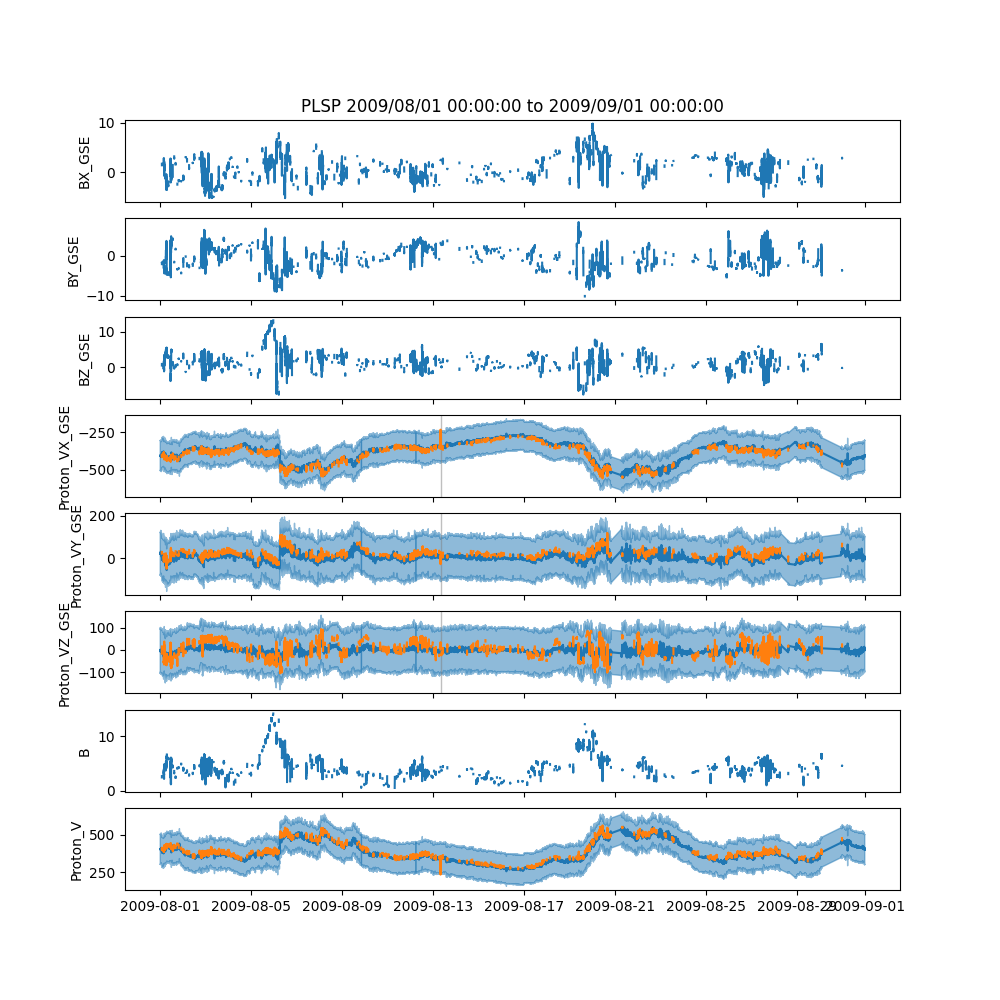

In [9]:
date1 = '2009/08/01 00:00:00'
date2 = '2009/09/01 00:00:00'
fig, ax = plt.subplots(len(df_PLSP_resample.keys()),figsize=(10,10),num='PLSP  ',clear=True,sharex=True)
ax[0].set_title('PLSP '+str(date1) + ' to ' + str(date2))
for idx, key in enumerate(['Proton_VX_moment','Proton_VY_moment','Proton_VZ_moment','Proton_V']):
    if idx == 3:
        idx=4
    l, = ax[idx+3].plot(df_SWE.loc[date1:date2].index,df_SWE.loc[date1:date2][key])
    ax[idx+3].fill_between(df_SWE.loc[date1:date2].index,df_SWE.loc[date1:date2][key]-100,df_SWE.loc[date1:date2][key]+100,alpha=0.5,color=l.get_color()) 
for idx, key in enumerate(df_PLSP_resample.keys()):
    ax[idx].plot(df_PLSP_resample.loc[date1:date2].index,(df_PLSP_resample.loc[date1:date2])[key])
    ax[idx].set_ylabel(key)
swe_range=[50,50,50]
particular_intervals = pd.read_csv('C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/flags_Vgse_plsp.txt',
                                      sep='\t',names=['start','end','quantity','flag'])
particular_intervals['start'] = pd.to_datetime(particular_intervals['start'])
particular_intervals['end'] = pd.to_datetime(particular_intervals['end'])
for idx, row in particular_intervals.iterrows():
    if row['start'] >= pd.Timestamp(date1) and row['end'] <= pd.Timestamp(date2):
        if row['quantity'] == 'V':
            for r in range(3,6):
                ax[r].axvspan(row['start'],row['end'],color='gray',alpha=0.5)
        elif row['quantity'] == 'B':
            for r in range(0,3):
                ax[r].axvspan(row['start'],row['end'],color='gray',alpha=0.5)
    elif row['start'] < pd.Timestamp(date1) and row['end'] <= pd.Timestamp(date2) and row['end'] > pd.Timestamp(date1):
        if row['quantity'] == 'V':
            for r in range(3,6):
                ax[r].axvspan(pd.Timestamp(date1),row['end'],color='gray',alpha=0.5)
        elif row['quantity'] == 'B':
            for r in range(0,3):
                ax[r].axvspan(pd.Timestamp(date1),row['end'],color='gray',alpha=0.5)
    elif row['start'] >= pd.Timestamp(date1) and row['end'] > pd.Timestamp(date2) and row['start'] < pd.Timestamp(date1):
        if row['quantity'] == 'V':
            for r in range(3,6):
                ax[r].axvspan(row['start'],pd.Timestamp(date2),color='gray',alpha=0.5)
        elif row['quantity'] == 'B':
            for r in range(0,3):
                ax[r].axvspan(row['start'],pd.Timestamp(date2),color='gray',alpha=0.5)

plt.show()

## Build final dataset

In [39]:
df_PLSP_final = df_PLSP_resample.copy()
particular_intervals = pd.read_csv('C:/Users/pauline/Documents/DATA/Space_Weather_Project/WIND/flags_Vgse_plsp.txt',
                                      sep='\t',names=['start','end','quantity','flag'])
particular_intervals['start'] = pd.to_datetime(particular_intervals['start'])
particular_intervals['end'] = pd.to_datetime(particular_intervals['end'])
for idx, row in particular_intervals.iterrows():
    df_PLSP_resample.loc[row['start']:row['end']] = np.nan
df_PLSP_final['NAN'] = df_PLSP_final.isna().sum(axis=1).astype(bool)

In [28]:
print(df_PLSP_final.isna().sum()/len(df_PLSP_final))
df_PLSP_final.head()


BX_GSE           0.412644
BY_GSE           0.412644
BZ_GSE           0.412644
Proton_VX_GSE    0.412644
Proton_VY_GSE    0.412644
Proton_VZ_GSE    0.412644
B                0.412644
Proton_V         0.412644
NAN              0.000000
dtype: float64


,BX_GSE,BY_GSE,BZ_GSE,Proton_VX_GSE,Proton_VY_GSE,Proton_VZ_GSE,B,Proton_V,NAN
2004-01-01 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2004-01-01 00:00:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2004-01-01 00:01:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2004-01-01 00:01:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2004-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [40]:
df_PLSP_final.tail()

,BX_GSE,BY_GSE,BZ_GSE,Proton_VX_GSE,Proton_VY_GSE,Proton_VZ_GSE,B,Proton_V,NAN
2010-12-31 23:58:24,-2.097376,3.568084,-1.470776,-338.597839,12.359410,-5.249374,4.392425,338.864014,False
2010-12-31 23:58:48,-1.855671,3.486877,-1.842920,-340.139771,10.343695,-4.491230,4.358691,340.326660,False
2010-12-31 23:59:12,-1.780639,3.439893,-1.961828,-340.331879,13.466987,-1.669156,4.341925,340.602325,False
2010-12-31 23:59:36,-1.527127,3.264010,-2.358234,-343.649811,11.965222,-0.759649,4.306640,343.858887,False
2011-01-01 00:00:00,-1.755065,3.320960,-2.115587,-341.250519,10.309605,-4.545645,4.311002,341.436462,False


In [41]:
df_split = []
start = df_PLSP_final.index[0]

for idx, row in particular_intervals.iterrows():
    if row['flag'] == 'gap' and row['quantity'] == 'V':
        if row['start'] > df_PLSP_final.index[0] and row['end'] < df_PLSP_final.index[-1]:
            df = df_PLSP_final.loc[start:row['start']]
            while df.iloc[0]['NAN']==True:
                df = df.iloc[1:]
            while df.iloc[-1]['NAN']==True:
                df = df.iloc[:-1]
            df_split.append(df)
        start = row['end']
for df in df_split:
    print(df.index[0],df.index[-1],df.index[-1]-df.index[0])
    print(df.describe())
    print(df.isna().sum()/len(df))
    print(df.head())
    print(df.tail())
    print('-----------------')

2004-05-03 00:00:00 2006-11-21 23:59:36 932 days 23:59:36
             BX_GSE        BY_GSE        BZ_GSE  Proton_VX_GSE  Proton_VY_GSE  \
count  3.037126e+06  3.037126e+06  3.037126e+06   3.037126e+06   3.037126e+06   
mean  -1.299634e-01  2.185535e-01  7.593300e-01  -4.556977e+02   1.512708e+01   
std    3.807834e+00  4.304014e+00  3.556160e+00   1.128102e+02   2.461017e+01   
min   -4.524081e+01 -4.854868e+01 -5.130808e+01  -1.356711e+03  -6.009419e+02   
25%   -2.865492e+00 -2.573437e+00 -9.727275e-01  -5.211619e+02   2.571492e+00   
50%   -1.807090e-01  2.429416e-01  7.518519e-01  -4.291758e+02   1.306694e+01   
75%    2.647831e+00  2.958663e+00  2.503384e+00  -3.710438e+02   2.526676e+01   
max    3.255762e+01  5.549907e+01  5.157833e+01  -4.804889e+01   6.168971e+02   

       Proton_VZ_GSE             B      Proton_V  
count   3.037126e+06  3.037126e+06  3.037126e+06  
mean   -1.066573e+00  5.895803e+00  4.570974e+02  
std     2.396358e+01  3.418731e+00  1.134159e+02  
min    -

In [42]:
df_to_save = df_PLSP_final.loc[df_split[0].index[0]:df_split[-1].index[-1]]
savloading.save(df_to_save,'C:/Users/pauline/Documents/DATA/Space_Weather_Project/pattern_recognition_forecast/Article/Datasets/',
                    'wind_plsp_24s_'
                    +str(df_to_save.index[0]).replace('-','').replace(' ','').replace(':','').replace('.','')+'_'
                    +str(df_to_save.index[-1]).replace('-','').replace(' ','').replace(':','').replace('.','')+'.pkl')

## Nan management

In [30]:
list_gaps = []
list_size_gap = []
for df in df_split:
    gaps = []
    size_gap = []
    index = df.index
    dnx = 0
    date = index[0]
    while date != index[-1]:
        nb = 0
        while df.iloc[dnx+1]['NAN'] == True:
            nb += 1
            dnx += 1
        if nb > 0:
            gaps.append(date)
            size_gap.append(nb)
        date = index[dnx+1]
        dnx += 1
    list_gaps.append(gaps)
    list_size_gap.append(size_gap)


In [31]:
for s,df in enumerate(df_split):
    df['GAP'] = np.zeros(len(df['NAN']))
    for g,gap in enumerate(list_gaps[s]):
        df.loc[gap,'GAP'] = list_size_gap[s][g]
    df_split[s] = df

In [16]:
for s,size_gap in enumerate(list_size_gap):
    print(np.bincount(size_gap)[100:].sum())

159
113
1103


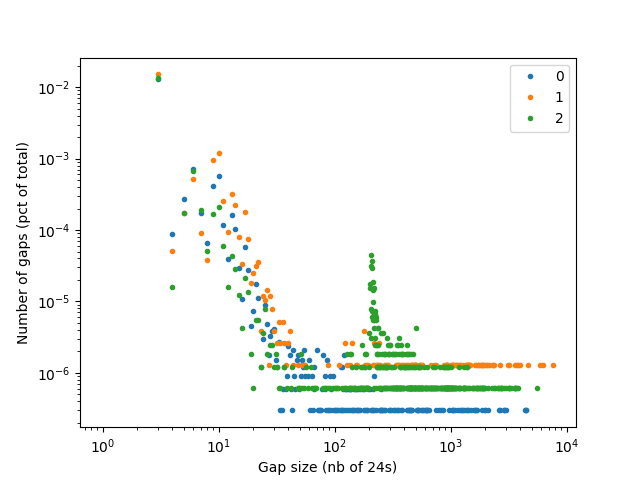

In [17]:
plt.figure('Gaps distribution')
plt.clf()
for s,size_gap in enumerate(list_size_gap):
    plt.plot(np.arange(max(size_gap)+1),np.bincount(size_gap)/len(df_split[s].index),'.',label=str(s))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Gap size (nb of 24s)')
plt.ylabel('Number of gaps (pct of total)')
plt.legend()
plt.show()

## Saving 

In [32]:
for df in df_split:
    print(df.columns)
    print(df.head())

Index(['BX_GSE', 'BY_GSE', 'BZ_GSE', 'Proton_VX_GSE', 'Proton_VY_GSE',
       'Proton_VZ_GSE', 'B', 'Proton_V', 'NAN', 'GAP'],
      dtype='object')
                       BX_GSE    BY_GSE    BZ_GSE  Proton_VX_GSE  \
2004-05-03 00:00:24 -4.957794  2.585974 -1.906769    -364.005798   
2004-05-03 00:00:48 -5.051198  2.461312 -1.404867    -362.083557   
2004-05-03 00:01:12 -5.052415  2.563380 -1.378377    -366.479706   
2004-05-03 00:01:36 -4.572182  3.536552 -2.304442    -370.966888   
2004-05-03 00:02:00 -4.778619  3.349349 -2.287986    -370.254608   

                     Proton_VY_GSE  Proton_VZ_GSE         B    Proton_V  \
2004-05-03 00:00:24      15.712634     -35.111317  5.907855  366.032654   
2004-05-03 00:00:48      16.114851     -40.914108  5.791918  364.743958   
2004-05-03 00:01:12      17.863741     -34.177399  5.830758  368.503174   
2004-05-03 00:01:36      10.939846     -26.117405  6.222741  372.046021   
2004-05-03 00:02:00      10.377151     -26.263920  6.268032  371.32

In [33]:
for df in df_split:
    savloading.save(df,'C:/Users/pauline/Documents/DATA/Space_Weather_Project/pattern_recognition_forecast/Article/Datasets/',
                    'wind_plsp_24s_'
                    +str(df.index[0]).replace('-','').replace(' ','').replace(':','').replace('.','')+'_'
                    +str(df.index[-1]).replace('-','').replace(' ','').replace(':','').replace('.','')+'.pkl')